In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from networkx.readwrite import json_graph
import json

import pandas

import copy
import random

In [ ]:
# MHO
adjmat_MHO  = pd.read_csv("../results/mho_edges.csv")
adjmat_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
adjmat_MHNO  = pd.read_csv("../results/mhno_edges.csv")
adjmat_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
adjmat_MUO  = pd.read_csv("../results/muo_edges.csv")
adjmat_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
adjmat_MUNO  = pd.read_csv("../results/muno_edges.csv")
adjmat_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

In [ ]:
# add metadata:
# MHO
metadata_MHO  = pd.read_csv("../results/mho_metadata.csv")
metadata_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
metadata_MHNO  = pd.read_csv("../results/mhno_metadata.csv")
metadata_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
metadata_MUO  = pd.read_csv("../results/muo_metadata.csv")
metadata_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
metadata_MUNO  = pd.read_csv("../results/muno_metadata.csv")
metadata_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

In [ ]:
def create_net(adjmat):
  # Create an empty graph
  tmpG= nx.Graph()

  # Iterate over the rows and columns of the DataFrame to add edges with weights
  for row in range(len(adjmat)):
    # print(adjmat.iloc[row, 0])
    source = adjmat.iloc[row, 0]
    target = adjmat.iloc[row, 1]
    weight = adjmat.iloc[row, 2]
    invWeight = 1 - weight

    # Skip diagonal and negative edges
    if source != target and weight > 0:
        tmpG.add_edge(source, target,
                      weight=weight,
                      invWeight = invWeight)
  return(tmpG)

In [ ]:
MHO = create_net(adjmat_MHO)
MHNO = create_net(adjmat_MHNO)
MUO = create_net(adjmat_MUO)
MUNO = create_net(adjmat_MUNO)

In [ ]:
def get_connected_graph(net):
  # Get a list of connected components
  components = list(nx.connected_components(net))
  # Find the largest connected component
  largest_component = max(components, key=len)
  # Create a new graph containing only the largest component
  net_largest = net.subgraph(largest_component)
  print('Connected graph:', nx.is_connected(net_largest))
  return(net_largest)


MHO = get_connected_graph(MHO)
MHNO = get_connected_graph(MHNO)
MUO = get_connected_graph(MUO)
MUNO = get_connected_graph(MUNO)

Connected graph: True
Connected graph: True
Connected graph: True
Connected graph: True


In [ ]:
def add_abundance(net, metadata):
  abundance_dict = pd.Series(metadata.Abundance.values, index=metadata.Label).to_dict()
  nx.set_node_attributes(net, abundance_dict, 'Abundance')

In [ ]:
add_abundance(MHO, metadata_MHO)
add_abundance(MHNO, metadata_MHNO)
add_abundance(MUO, metadata_MUO)
add_abundance(MUNO, metadata_MUNO)

In [ ]:
mho_col = "#2a9d8f"
mhno_col = "#264653"
muo_col = "#edafb8"
muno_col = "#703d67"

In [ ]:
x_vals_MHO = [ 100 *i/MHO.order() for i in range(MHO.order())]
x_vals_MHNO = [ 100 *i/MHNO.order() for i in range(MHNO.order())]
x_vals_MUO = [ 100 *i/MUO.order() for i in range(MUO.order())]
x_vals_MUNO = [ 100 *i/MUNO.order() for i in range(MUNO.order())]

# Degree-based atacks

In [ ]:
def attack_degree(g, n):
  lcc_sizes = []
  for i in range(n):
    node = max(g.degree, key = lambda x: x[1])[0]
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [ ]:
MHO_kk = nx.Graph(MHO)
MHO_lcc_sizes_degree = attack_degree(MHO_kk, MHO_kk.order())

MHNO_kk = nx.Graph(MHNO)
MHNO_lcc_sizes_degree = attack_degree(MHNO_kk, MHNO_kk.order())

MUO_kk = nx.Graph(MUO)
MUO_lcc_sizes_degree = attack_degree(MUO_kk, MUO_kk.order())

MUNO_kk = nx.Graph(MUNO)
MUNO_lcc_sizes_degree = attack_degree(MUNO_kk, MUNO_kk.order())

In [ ]:
def find_i50(x_vals, y_vals):
  i50 = []
  for i,j in zip(x_vals, y_vals):
    if j>=50:
      i50.append(i)
  return(i50[-1])

ic50deg = [find_i50(i,j) for (i,j) in [(x_vals_MHO, MHO_deg_to_plot),
                               (x_vals_MHNO, MHNO_deg_to_plot),
                               (x_vals_MUO, MUO_deg_to_plot),
                               (x_vals_MUNO, MUNO_deg_to_plot)]]

print("#### DEGREE ####")
print("MHO:", find_i50(x_vals_MHO, MHO_deg_to_plot))
print("MHNO:", find_i50(x_vals_MHNO, MHNO_deg_to_plot))
print("MUO:", find_i50(x_vals_MUO, MUO_deg_to_plot))
print("MUNO:", find_i50(x_vals_MUNO, MUNO_deg_to_plot))

#### DEGREE ####
MHO: 31.141868512110726
MHNO: 32.35294117647059
MUO: 19.745222929936304
MUNO: 19.637462235649547


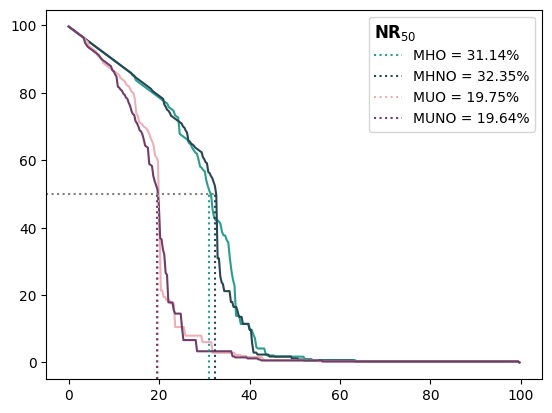

In [ ]:
MHO_deg_to_plot = [ 100 *i/MHO.order() for i in MHO_lcc_sizes_degree]
MHNO_deg_to_plot = [ 100 *i/MHNO.order() for i in MHNO_lcc_sizes_degree]
MUO_deg_to_plot = [ 100 *i/MUO.order() for i in MUO_lcc_sizes_degree]
MUNO_deg_to_plot = [ 100 *i/MUNO.order() for i in MUNO_lcc_sizes_degree]

# Betweenness-based attacks


In [ ]:
def attack_betweenness(g, n, verbose = False):
  lcc_sizes = []
  for i in range(n):
    if verbose:
      print(i)
    bet = nx.betweenness_centrality(g, weight="invWeight")
    node = max(bet, key=bet.get)
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [ ]:
MHO_kk = nx.Graph(MHO)
MHO_lcc_sizes_betweenness = attack_betweenness(MHO_kk, MHO_kk.order())

MHNO_kk = nx.Graph(MHNO)
MHNO_lcc_sizes_betweenness = attack_betweenness(MHNO_kk, MHNO_kk.order())

MUO_kk = nx.Graph(MUO)
MUO_lcc_sizes_betweenness = attack_betweenness(MUO_kk, MUO_kk.order())

MUNO_kk = nx.Graph(MUNO)
MUNO_lcc_sizes_betweenness = attack_betweenness(MUNO_kk, MUNO_kk.order())

In [ ]:
# find ic50
ic50betw = [find_i50(i,j) for (i,j) in [(x_vals_MHO, MHO_betw_to_plot),
                               (x_vals_MHNO, MHNO_betw_to_plot),
                               (x_vals_MUO, MUO_betw_to_plot),
                               (x_vals_MUNO, MUNO_betw_to_plot)]]

print("#### BETWEENNESS ####")
print("MHO:", find_i50(x_vals_MHO, MHO_betw_to_plot))
print("MHNO:", find_i50(x_vals_MHNO, MHNO_betw_to_plot))
print("MUO:", find_i50(x_vals_MUO, MUO_betw_to_plot))
print("MUNO:", find_i50(x_vals_MUNO, MUNO_betw_to_plot))

#### BETWEENNESS ####
MHO: 19.031141868512112
MHNO: 24.705882352941178
MUO: 13.375796178343949
MUNO: 12.688821752265861


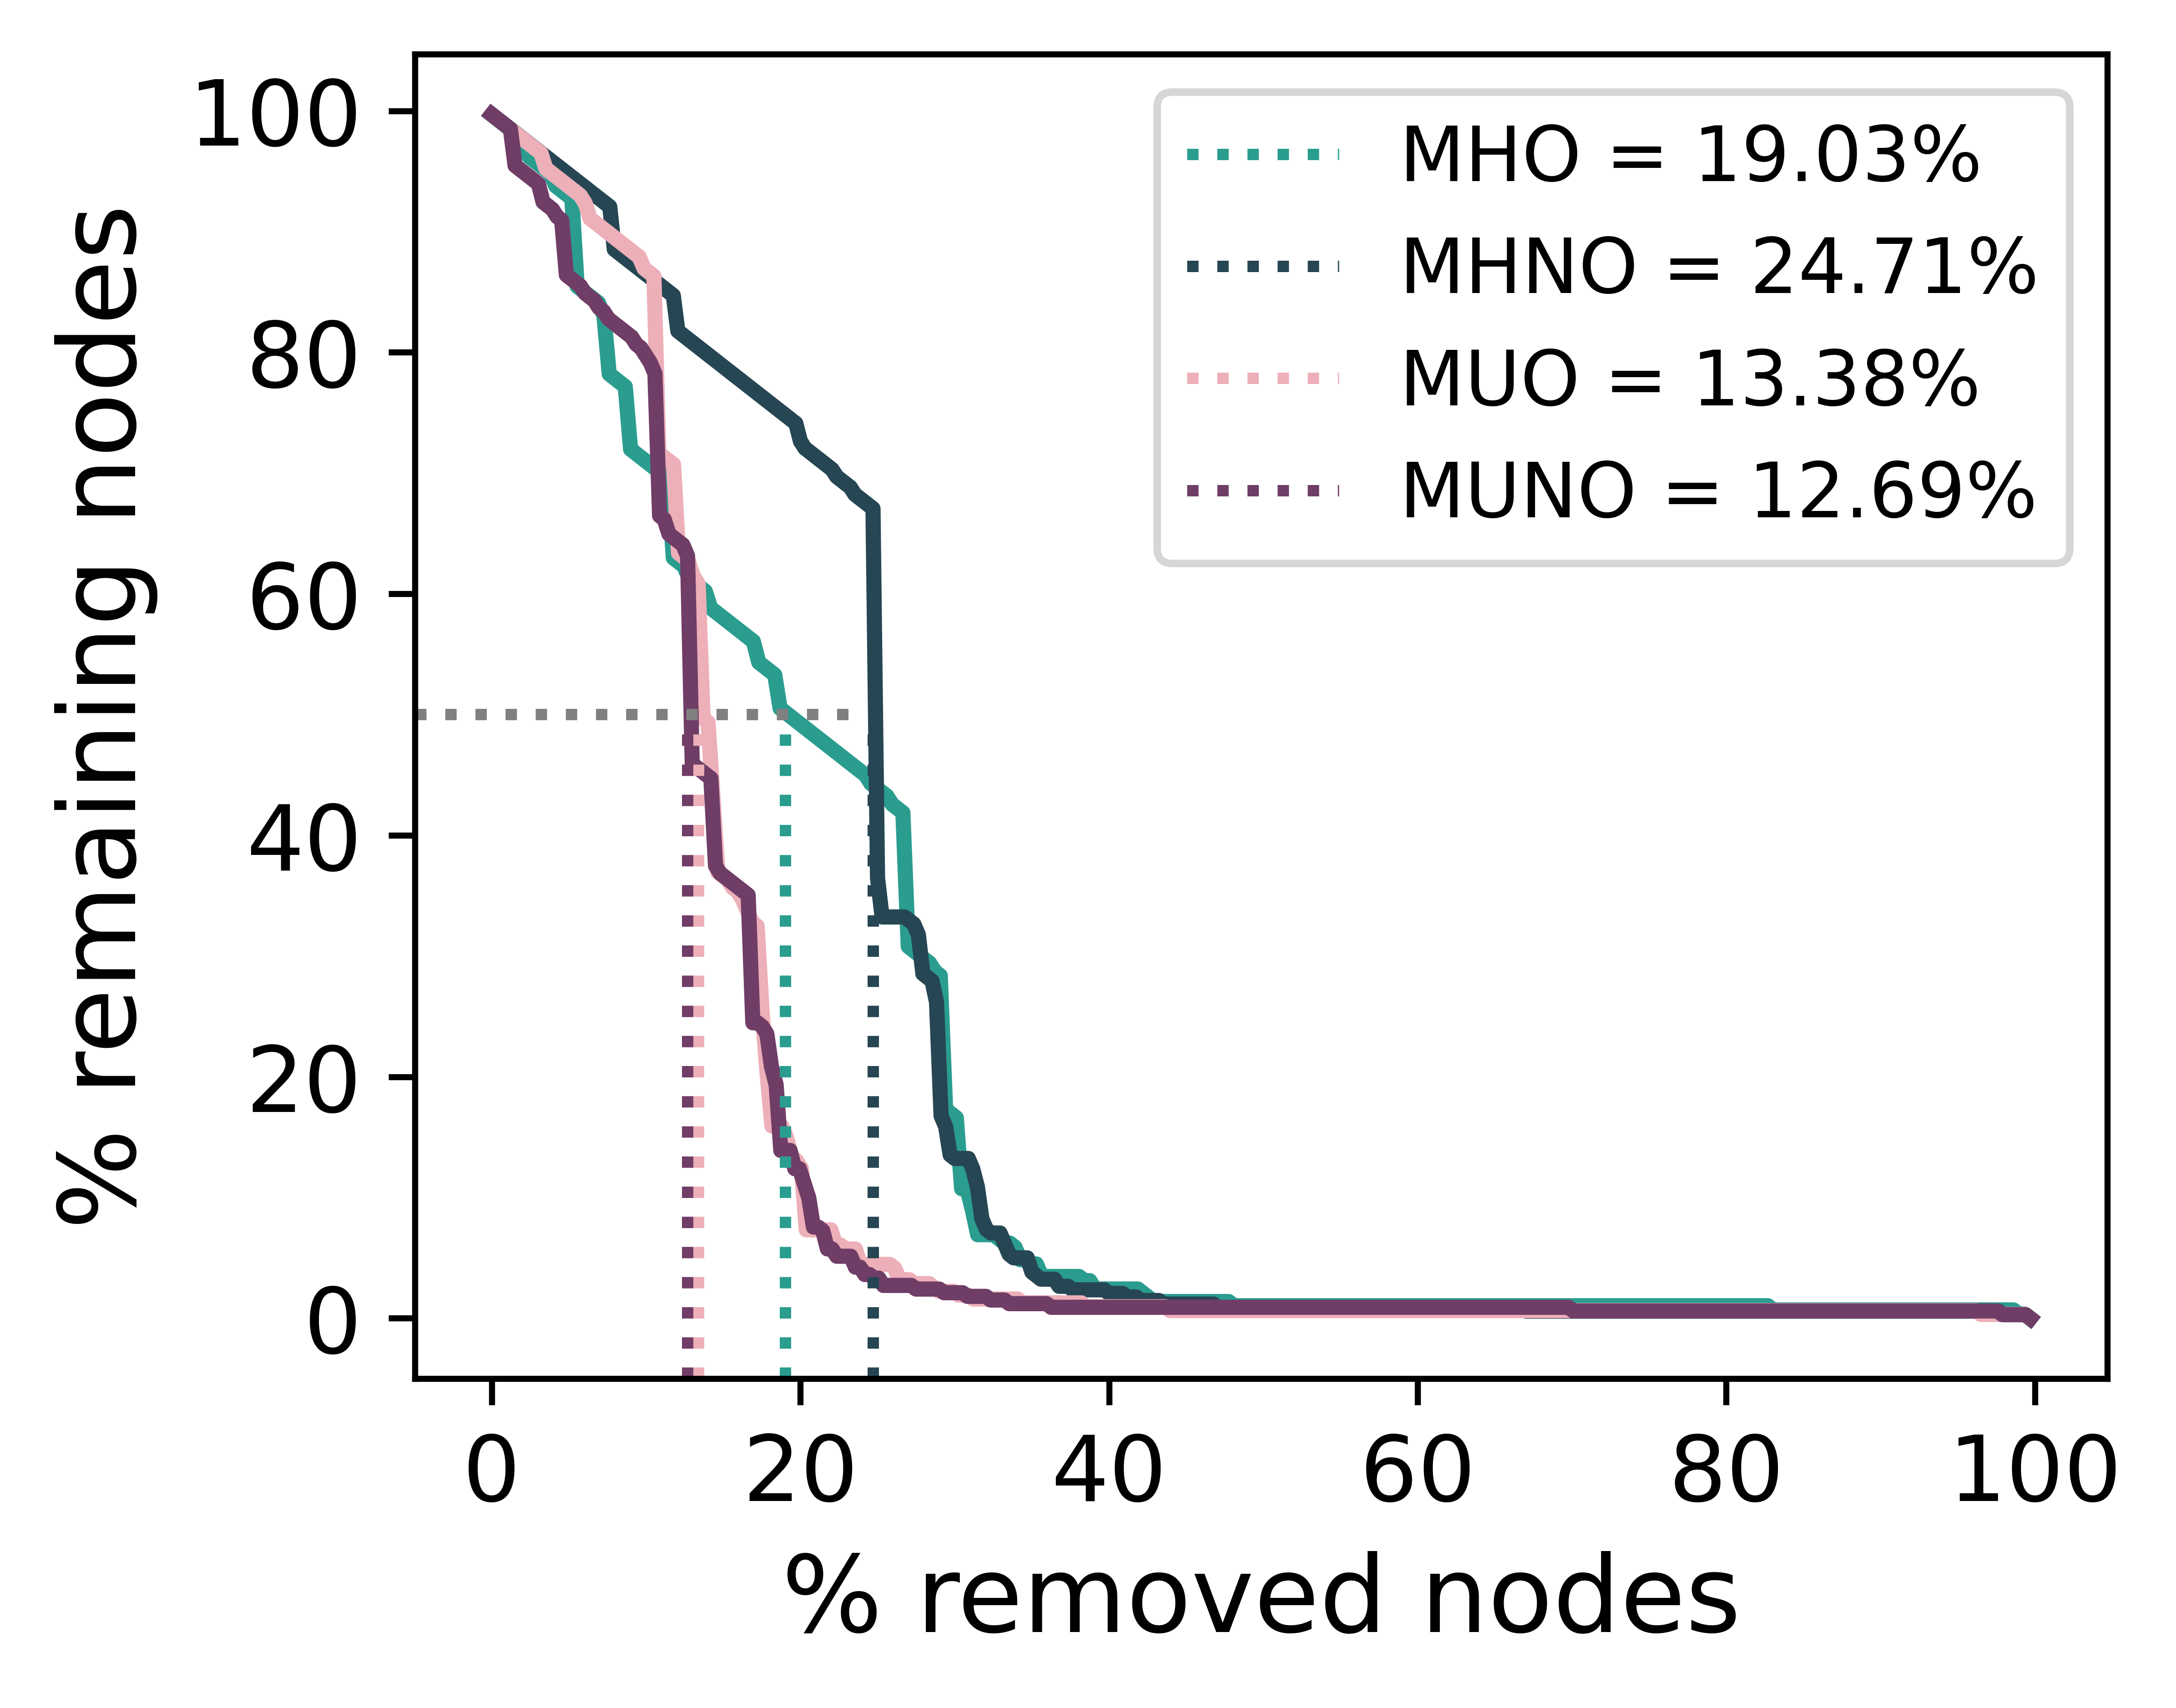

In [ ]:
MHO_betw_to_plot = [ 100 *i/MHO.order() for i in MHO_lcc_sizes_betweenness]
MHNO_betw_to_plot = [ 100 *i/MHNO.order() for i in MHNO_lcc_sizes_betweenness]
MUO_betw_to_plot = [ 100 *i/MUO.order() for i in MUO_lcc_sizes_betweenness]
MUNO_betw_to_plot = [ 100 *i/MUNO.order() for i in MUNO_lcc_sizes_betweenness]

# Plot

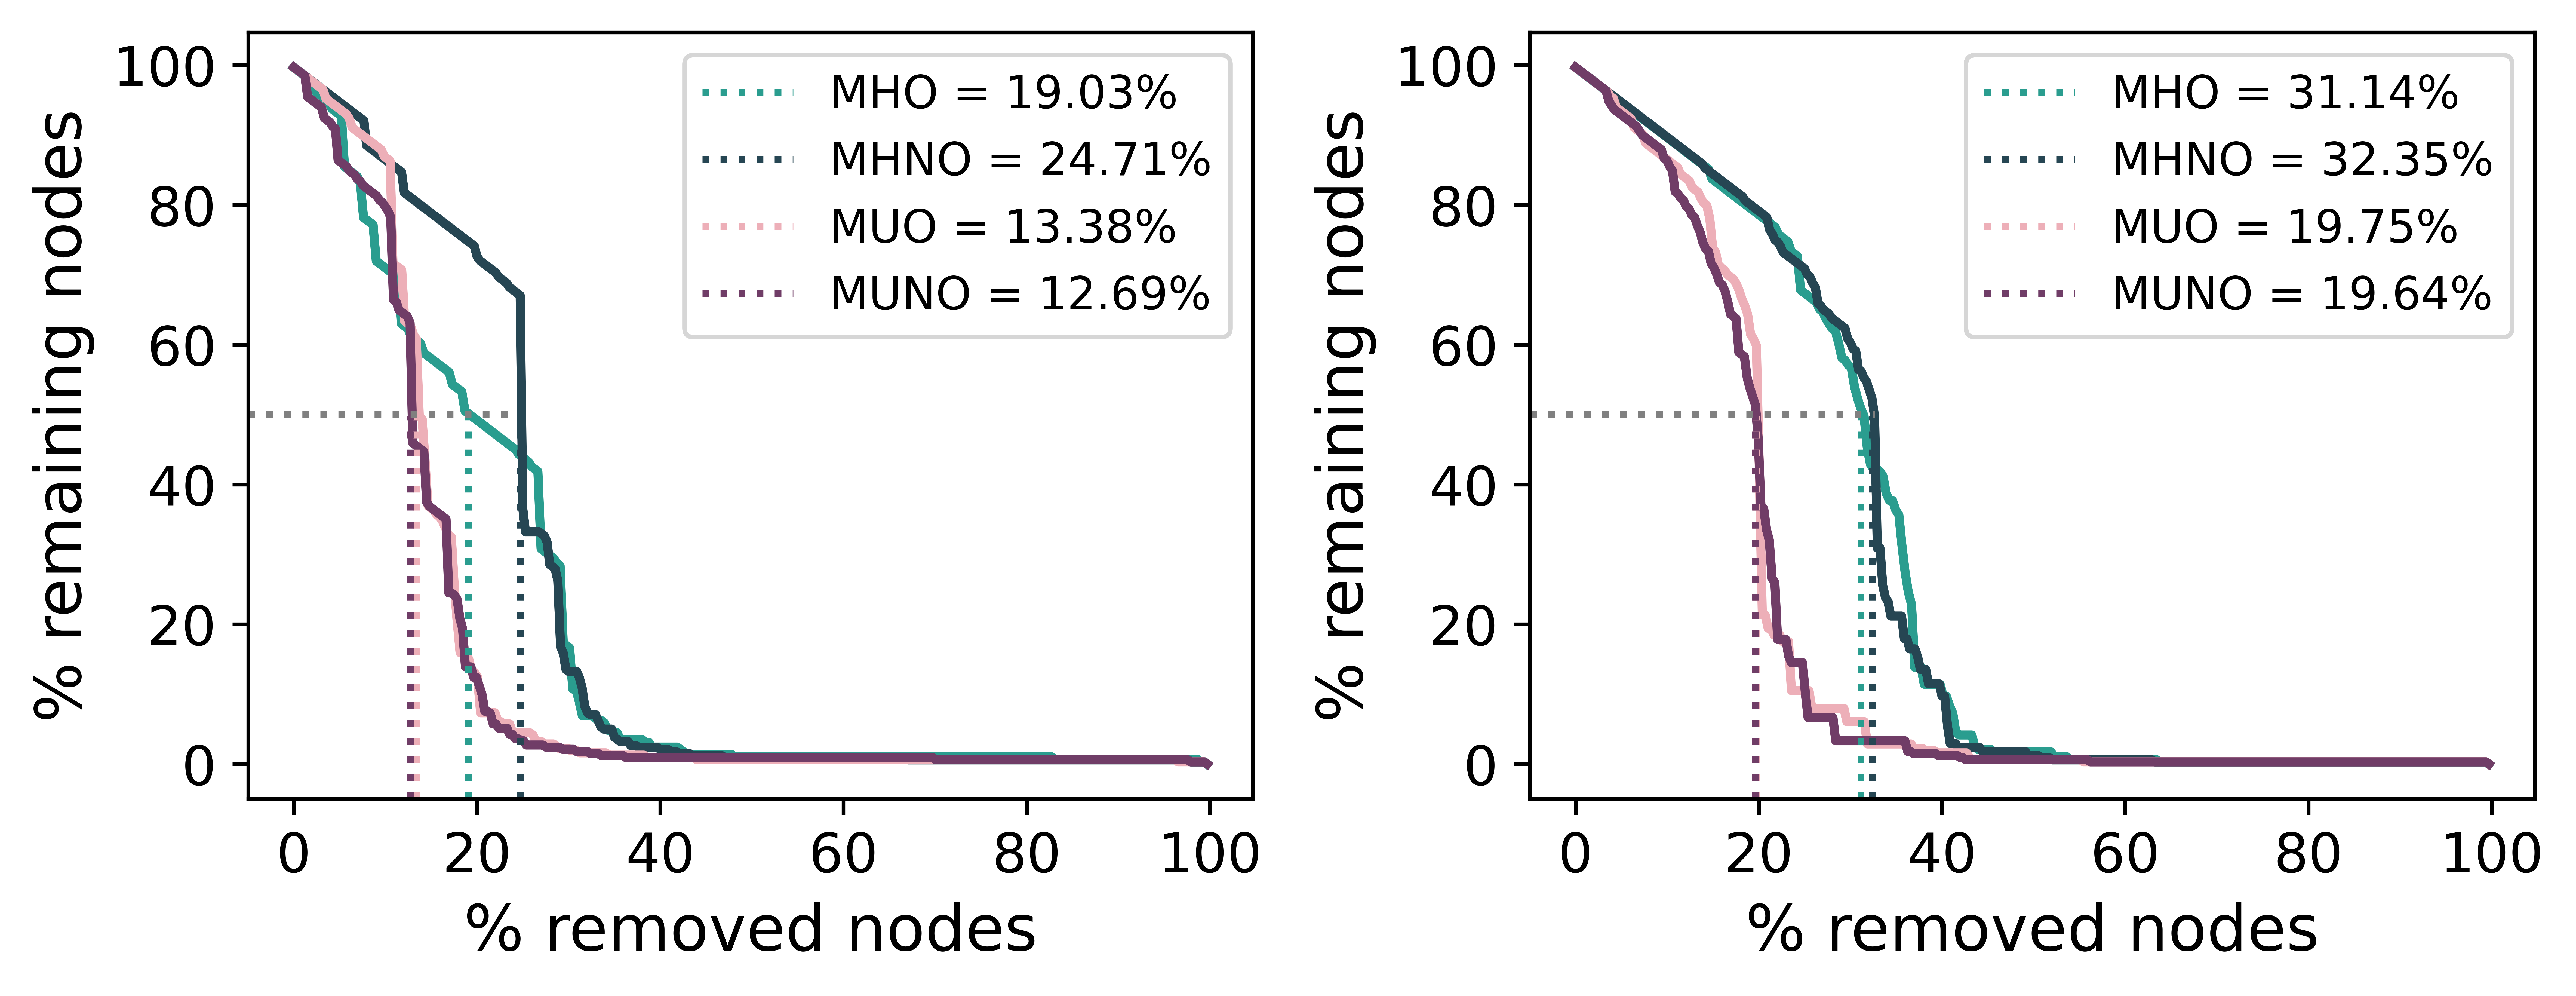

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.15), dpi=1200)  

# Plot 1
ax1.plot(x_vals_MHO, MHO_betw_to_plot, color=mho_col, linewidth=2)
ax1.plot(x_vals_MHNO, MHNO_betw_to_plot, color=mhno_col, linewidth=2)
ax1.plot(x_vals_MUO, MUO_betw_to_plot, color=muo_col, linewidth=2)
ax1.plot(x_vals_MUNO, MUNO_betw_to_plot, color=muno_col, linewidth=2)
ax1.axvline(ic50betw[0], ymin=0, ymax=0.5, color=mho_col, linestyle=":", label=f"MHO = {ic50betw[0]:.2f}%")
ax1.axvline(ic50betw[1], ymin=0, ymax=0.5, color=mhno_col, linestyle=":", label=f"MHNO = {ic50betw[1]:.2f}%")
ax1.axvline(ic50betw[2], ymin=0, ymax=0.5, color=muo_col, linestyle=":", label=f"MUO = {ic50betw[2]:.2f}%")
ax1.axvline(ic50betw[3], ymin=0, ymax=0.5, color=muno_col, linestyle=":", label=f"MUNO = {ic50betw[3]:.2f}%")
ax1.axhline(y=50, color='grey', linestyle=':', xmin=0, xmax=0.02 + ic50betw[1]/100)
ax1.set_xlabel("% removed nodes", fontsize=14)
ax1.set_ylabel("% remaining nodes", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
legend1 = ax1.legend(loc="best")
legend1._legend_box.align = "left"  

# Plot 2
ax2.plot(x_vals_MHO, MHO_deg_to_plot, color=mho_col, linewidth=2)
ax2.plot(x_vals_MHNO, MHNO_deg_to_plot, color=mhno_col, linewidth=2)
ax2.plot(x_vals_MUO, MUO_deg_to_plot, color=muo_col, linewidth=2)
ax2.plot(x_vals_MUNO, MUNO_deg_to_plot, color=muno_col, linewidth=2)
ax2.axvline(ic50deg[0], ymin=0, ymax=0.5, color=mho_col, linestyle=":", label=f"MHO = {ic50deg[0]:.2f}%")
ax2.axvline(ic50deg[1], ymin=0, ymax=0.5, color=mhno_col, linestyle=":", label=f"MHNO = {ic50deg[1]:.2f}%")
ax2.axvline(ic50deg[2], ymin=0, ymax=0.5, color=muo_col, linestyle=":", label=f"MUO = {ic50deg[2]:.2f}%")
ax2.axvline(ic50deg[3], ymin=0, ymax=0.5, color=muno_col, linestyle=":", label=f"MUNO = {ic50deg[3]:.2f}%")
ax2.axhline(y=50, color='grey', linestyle=':', xmin=0, xmax=0.02 + ic50deg[1]/100)
ax2.set_xlabel("% removed nodes", fontsize=14)
ax2.set_ylabel("% remaining nodes", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
legend2 = ax2.legend(loc="best")
legend2._legend_box.align = "left"  

plt.tight_layout()

plt.savefig("../figures/targetedAttacks.png",
            format='png', dpi=1200,
            bbox_inches='tight')

plt.show()


# Abundance-based attacks

In [ ]:
def attack_abundance(g, n, verbose = False):
  lcc_sizes = []
  for i in range(n):
    #print(i)
    node = sorted(g.nodes(), key=lambda n: g.nodes[n]['Abundance'])[-1]
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [ ]:
MHO_kk = nx.Graph(MHO)
MHO_lcc_sizes_abundance = attack_abundance(MHO_kk, MHO_kk.order())

MHNO_kk = nx.Graph(MHNO)
MHNO_lcc_sizes_abundance = attack_abundance(MHNO_kk, MHNO_kk.order())

MUO_kk = nx.Graph(MUO)
MUO_lcc_sizes_abundance = attack_abundance(MUO_kk, MUO_kk.order())

MUNO_kk = nx.Graph(MUNO)
MUNO_lcc_sizes_abundance = attack_abundance(MUNO_kk, MUNO_kk.order())

MHO
MHNO
MUO
MUNO


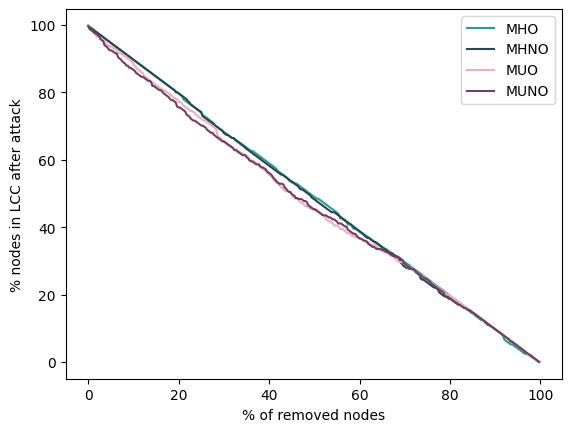

In [ ]:
MHO_ab_to_plot = [ 100 *i/MHO.order() for i in MHO_lcc_sizes_abundance]
MHNO_ab_to_plot = [ 100 *i/MHNO.order() for i in MHNO_lcc_sizes_abundance]
MUO_ab_to_plot = [ 100 *i/MUO.order() for i in MUO_lcc_sizes_abundance]
MUNO_ab_to_plot = [ 100 *i/MUNO.order() for i in MUNO_lcc_sizes_abundance]

In [ ]:
print("#### DESCENDING ABUNDANCE ####")
print("MHO:", find_i50(x_vals_MHO, MHO_ab_to_plot))
print("MHNO:", find_i50(x_vals_MHNO, MHNO_ab_to_plot))
print("MUO:", find_i50(x_vals_MUO, MUO_ab_to_plot))
print("MUNO:", find_i50(x_vals_MUNO, MUNO_ab_to_plot))

ic50ab = [find_i50(i,j) for (i,j) in [(x_vals_MHO, MHO_ab_to_plot),
                               (x_vals_MHNO, MHNO_ab_to_plot),
                               (x_vals_MUO, MUO_ab_to_plot),
                               (x_vals_MUNO, MUNO_ab_to_plot)]]

#### DESCENDING ABUNDANCE ####
MHO: 48.78892733564014
MHNO: 48.529411764705884
MUO: 44.904458598726116
MUNO: 44.71299093655589


### Increasing abundancea

In [ ]:
def attack_abundance(g, n, verbose = False):
  lcc_sizes = []
  for i in range(n):
    #print(i)
    node = sorted(g.nodes(), key=lambda n: g.nodes[n]['Abundance'])[0]
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [ ]:
MHO_kk = nx.Graph(MHO)
MHO_lcc_sizes_abundance = attack_abundance(MHO_kk, MHO_kk.order())

MHNO_kk = nx.Graph(MHNO)
MHNO_lcc_sizes_abundance = attack_abundance(MHNO_kk, MHNO_kk.order())

MUO_kk = nx.Graph(MUO)
MUO_lcc_sizes_abundance = attack_abundance(MUO_kk, MUO_kk.order())

MUNO_kk = nx.Graph(MUNO)
MUNO_lcc_sizes_abundance = attack_abundance(MUNO_kk, MUNO_kk.order())

MHO
MHNO
MUO
MUNO


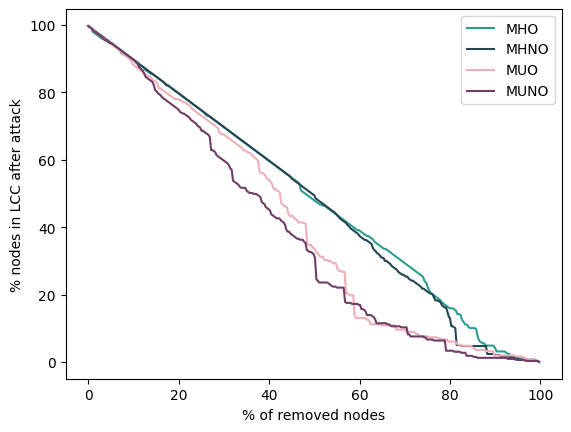

In [ ]:
MHO_ab2_to_plot = [ 100 *i/MHO.order() for i in MHO_lcc_sizes_abundance]
MHNO_ab2_to_plot = [ 100 *i/MHNO.order() for i in MHNO_lcc_sizes_abundance]
MUO_ab2_to_plot = [ 100 *i/MUO.order() for i in MUO_lcc_sizes_abundance]
MUNO_ab2_to_plot = [ 100 *i/MUNO.order() for i in MUNO_lcc_sizes_abundance]

In [ ]:
print("#### INCREASING ABUNDANCE ####")
print("MHO:", find_i50(x_vals_MHO, MHO_ab2_to_plot))
print("MHNO:", find_i50(x_vals_MHNO, MHNO_ab2_to_plot))
print("MUO:", find_i50(x_vals_MUO, MUO_ab2_to_plot))
print("MUNO:", find_i50(x_vals_MUNO, MUNO_ab2_to_plot))


ic50ab2 = [find_i50(i,j) for (i,j) in [(x_vals_MHO, MHO_ab2_to_plot),
                               (x_vals_MHNO, MHNO_ab2_to_plot),
                               (x_vals_MUO, MUO_ab2_to_plot),
                               (x_vals_MUNO, MUNO_ab2_to_plot)]]


#### INCREASING ABUNDANCE ####
MHO: 47.75086505190311
MHNO: 49.411764705882355
MUO: 42.35668789808917
MUNO: 36.25377643504532


## Plot

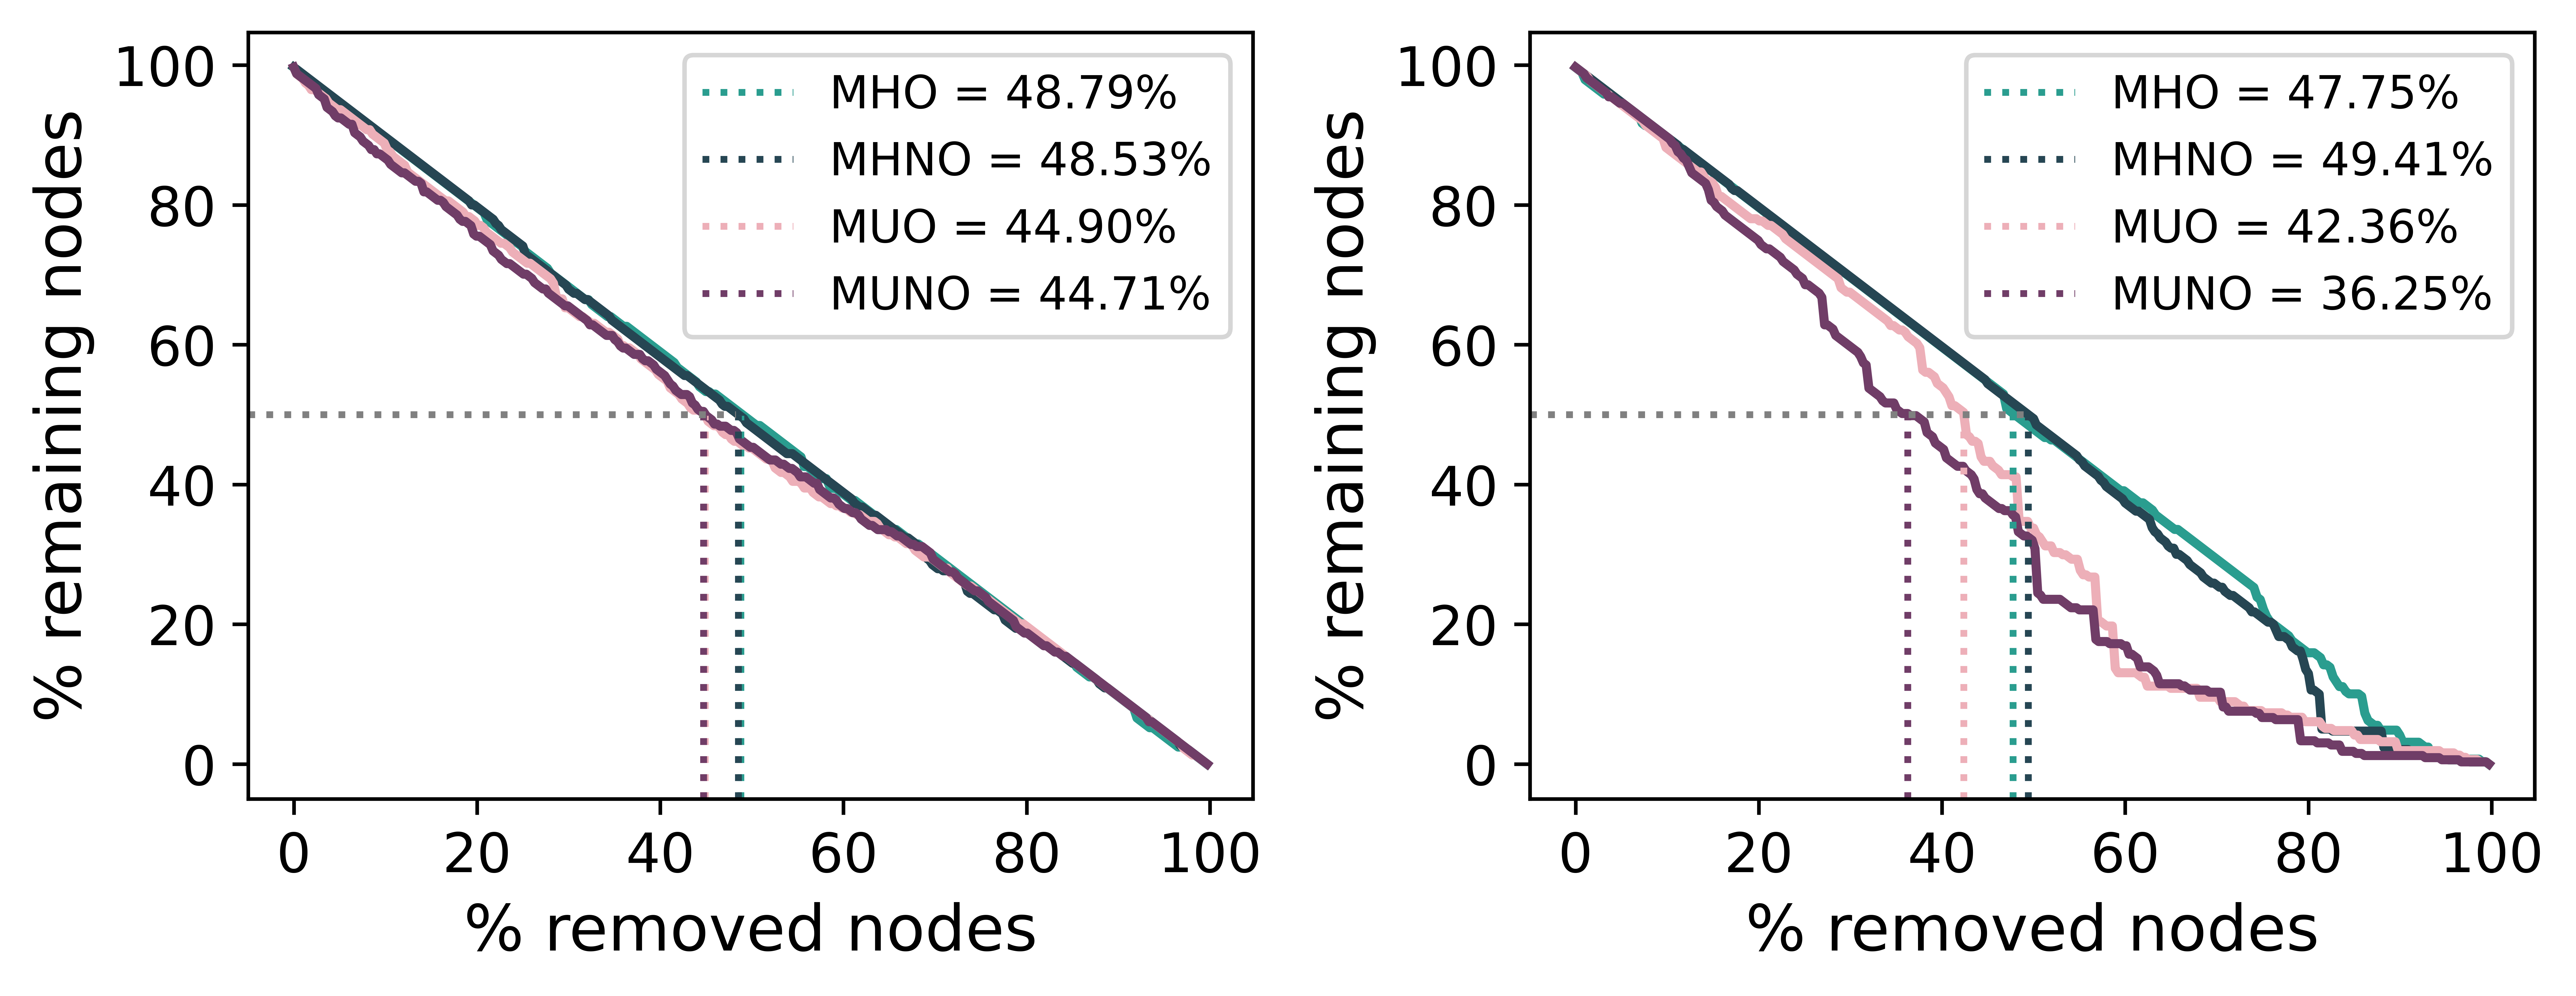

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.15), dpi=1200) 

# Plot 1
ax1.plot(x_vals_MHO, MHO_ab_to_plot, color=mho_col, linewidth=2)
ax1.plot(x_vals_MHNO, MHNO_ab_to_plot, color=mhno_col, linewidth=2)
ax1.plot(x_vals_MUO, MUO_ab_to_plot, color=muo_col, linewidth=2)
ax1.plot(x_vals_MUNO, MUNO_ab_to_plot, color=muno_col, linewidth=2)
ax1.axvline(ic50ab[0], ymin=0, ymax=0.5, color=mho_col, linestyle=":", label=f"MHO = {ic50ab[0]:.2f}%")
ax1.axvline(ic50ab[1], ymin=0, ymax=0.5, color=mhno_col, linestyle=":", label=f"MHNO = {ic50ab[1]:.2f}%")
ax1.axvline(ic50ab[2], ymin=0, ymax=0.5, color=muo_col, linestyle=":", label=f"MUO = {ic50ab[2]:.2f}%")
ax1.axvline(ic50ab[3], ymin=0, ymax=0.5, color=muno_col, linestyle=":", label=f"MUNO = {ic50ab[3]:.2f}%")
ax1.axhline(y=50, color='grey', linestyle=':', xmin=0, xmax=ic50ab[1]/100)
ax1.set_xlabel("% removed nodes", fontsize=14)
ax1.set_ylabel("% remaining nodes", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
legend1 = ax1.legend(loc="best")
legend1._legend_box.align = "left"  

# Plot 2
ax2.plot(x_vals_MHO, MHO_ab2_to_plot, color=mho_col, linewidth=2)
ax2.plot(x_vals_MHNO, MHNO_ab2_to_plot, color=mhno_col, linewidth=2)
ax2.plot(x_vals_MUO, MUO_ab2_to_plot, color=muo_col, linewidth=2)
ax2.plot(x_vals_MUNO, MUNO_ab2_to_plot, color=muno_col, linewidth=2)
ax2.axvline(ic50ab2[0], ymin=0, ymax=0.5, color=mho_col, linestyle=":", label=f"MHO = {ic50ab2[0]:.2f}%")
ax2.axvline(ic50ab2[1], ymin=0, ymax=0.5, color=mhno_col, linestyle=":", label=f"MHNO = {ic50ab2[1]:.2f}%")
ax2.axvline(ic50ab2[2], ymin=0, ymax=0.5, color=muo_col, linestyle=":", label=f"MUO = {ic50ab2[2]:.2f}%")
ax2.axvline(ic50ab2[3], ymin=0, ymax=0.5, color=muno_col, linestyle=":", label=f"MUNO = {ic50ab2[3]:.2f}%")
ax2.axhline(y=50, color='grey', linestyle=':', xmin=0, xmax=ic50ab2[1]/100)
ax2.set_xlabel("% removed nodes", fontsize=14)
ax2.set_ylabel("% remaining nodes", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
legend2 = ax2.legend(loc="best")
legend2._legend_box.align = "left"  

plt.tight_layout()

plt.savefig("../figures/abundanceAttacks.png",
            format='png', dpi=1200,
            bbox_inches='tight')

plt.show()